# Addestramento e Valutazione di Yolo11 per il Rilevamento di Segnali Stradali + classificatore condizioni MobileNet

Questo notebook implementa una pipeline per l'addestramento e la valutazione del modello **Yolo11m**, successivamente questo modello viene usato per la detection dei segnali che verrano passati al modello **MobileNet** per la classificazione binaria del segnale (good/worn-out)

---

## Impostazione dell'Ambiente:
* Importazione delle librerie necessarie e configurazione dell'ambiente.

In [1]:
 !pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 33.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
google-cola

In [2]:
import os

In [3]:
!pip uninstall -y wandb ultralytics

Found existing installation: wandb 0.19.9
Uninstalling wandb-0.19.9:
  Successfully uninstalled wandb-0.19.9


In [4]:
!pip install -U wandb ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 83.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 2.8 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-

In [ ]:
!yolo settings wandb=True

In [ ]:
import os
import wandb

wandb.login(key ="413d62d995ab3c7f6e8c2eacc4a544794ed6cb93")  

---

## Download YOLO11m tramite la libreria Ultralytics 

In [ ]:
from ultralytics import YOLO

In [84]:
model = YOLO('yolo11m.pt')

100%|██████████| 38.8M/38.8M [00:00<00:00, 255MB/s]


---

## Preparazione del Dataset:

* Download e preparazione del dataset personalizzato di segnali stradali da Roboflow, in formato YOLO.
* Organizzazione dei file del dataset e creazione del file `data.yaml` che descrive i percorsi del training/validation set, il numero di classi e i nomi delle classi.


In [85]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3TtQzlTxV5vuuUIr5sJk")
project = rf.workspace("toquinho").project("object-detection-signals")
version = project.version(1)
dataset = version.download("yolo11")

loading Roboflow workspace...
loading Roboflow project...

Version export complete for yolo11 format


In [95]:
!mkdir datasets

In [96]:
!cp -r Object-Detection-Signals-1/* datasets

cp: cannot stat 'Object-Detection-Signals-1/*': No such file or directory


In [97]:
os.chdir("datasets")

## struttare del dataset

In [98]:
yaml_content = """
names:
- Directions
- Do_not_stop
- Right_Passage_Obligation
- deviation
- give_way
- parking_area
- pedestrian_crossing
- priority_road
- prohibition
- speed_limits
- stop
- work_in_progress
nc: 12
roboflow:
  license: CC BY 4.0
  project: object-detection-signals
  url: https://universe.roboflow.com/toquinho/object-detection-signals/dataset/1
  version: 1
  workspace: toquinho
test: test/images
train: train/images
val: valid/images"""

with open("data.yaml", "w") as file:
    file.write(yaml_content)


In [99]:
!cat data.yaml


names:
- Directions
- Do_not_stop
- Right_Passage_Obligation
- deviation
- give_way
- parking_area
- pedestrian_crossing
- priority_road
- prohibition
- speed_limits
- stop
- work_in_progress
nc: 12
roboflow:
  license: CC BY 4.0
  project: object-detection-signals
  url: https://universe.roboflow.com/toquinho/object-detection-signals/dataset/1
  version: 1
  workspace: toquinho
test: test/images
train: train/images
val: valid/images

---

# TRANING YOLO11m

**Configurazione del Modello e dell'Addestramento:**
* Impostazione dei parametri di addestramento tramite la funzione `train()` del modello:
    
    * `data`: Percorso al file `data.yaml`.
    * `epochs`: **60 epoche**.
    * `imgsz`: **640** corrisponde alla dimensione dell'immagine.
    * `batch`: **16** corrisponde alla grandezza del batch.
    * `project`:  **Yolo11_Wandb** nome del progetto su wandb

In [ ]:
results = model.train(
    data="data.yaml",         
    epochs=60,                
    imgsz=640,                
    batch=16,                 
    name="run_yolo11",        
    project="Yolo11_Wandb",   
    verbose=True              
)

---

# Valutazione del Modello Addestrato

Dopo l'addestramento, valuto le prestazioni del modello sul set di validazione. 
* Utilizzo il metodo `model.val()` specificando il dataset, la dimensione dell'immagine e le soglie di confidenza (`conf`) e IoU (`iou`) per il calcolo delle metriche come mAP, Precision, Recall.
* Questo passaggio viene ripetuto per ogni checkpoint che analizzo (20, 40, 60 epoche).

## Validazione del modello su test set con i pesi best.pt



In [101]:
model = YOLO("/kaggle/working/datasets/Yolo11_Wandb/run_yolo116/weights/best.pt")

In [ ]:
metrics = model.val(data='data.yaml',conf=0.5,iou=0.7, imgsz=640, split='test')

## Validazione del modello su test set con i pesi last.pt

In [17]:
model = YOLO("/kaggle/working/datasets/Yolo11_Wandb/run_yolo116/weights/last.pt")

In [18]:
metrics = model.val(data='data.yaml',conf=0.5,iou=0.7, imgsz=640, split='test')

Ultralytics 8.3.155 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m summary (fused): 125 layers, 20,039,284 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1348.1±359.1 MB/s, size: 41.5 KB)


val: Scanning /kaggle/working/datasets/test/labels.cache... 160 images, 33 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 7, len(boxes) = 262. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.95it/s]
invalid value encountered in less
invalid value encountered in less


                   all        160        262      0.914      0.868      0.903      0.622
            Directions         31         53      0.703      0.849      0.804      0.566
           Do_not_stop         12         13      0.917      0.846      0.916      0.605
Right_Passage_Obligation         23         26      0.846      0.846      0.871      0.577
             deviation          2          2          1          1      0.995      0.759
              give_way         25         31      0.966      0.903      0.939       0.58
          parking_area         10         11      0.667      0.545      0.652      0.398
   pedestrian_crossing         31         48      0.875      0.875      0.887      0.544
         priority_road         22         22          1      0.818      0.909      0.616
           prohibition          4          4          1          1      0.995      0.796
          speed_limits         37         46          1      0.935      0.967      0.659
                  s

---

### Predizione su immagine singola 

In [19]:
metrics = model.predict(source=["/kaggle/working/Object-Detection-Signals-1/test/images/1277381671Image000011_jpg.rf.d9dc0ed62160117aa9c782bababb998c.jpg"],conf=0.5,iou=0.7, imgsz=640, save=True)


0: 640x640 3 Directionss, 15.9ms
Speed: 1.4ms preprocess, 15.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


## Predizione batch su immagini di test
In questa fase vengono eseguite predizioni su più immagini, salvando ogni risultato nella cartella `pred`.

In [20]:
val= os.listdir("test/images")

In [21]:
c= []
for v in val :
    
    c.append("test/images/"+ v)

In [ ]:
output_path = "pred"
for valori in c :
    metrics = model.predict(source= valori ,conf=0.5,iou=0.7, imgsz=640,save= True, save_dir=output_path )

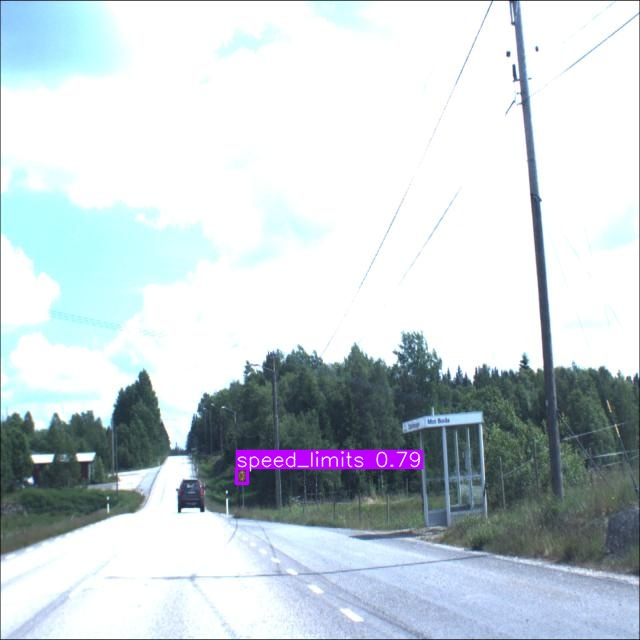

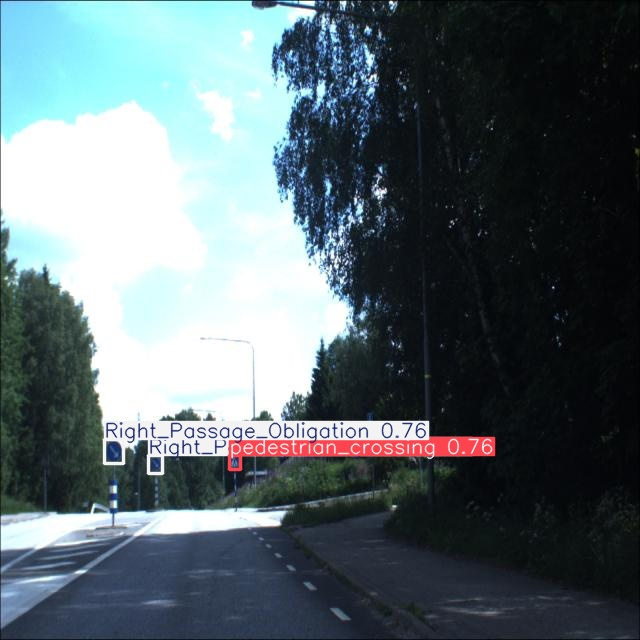

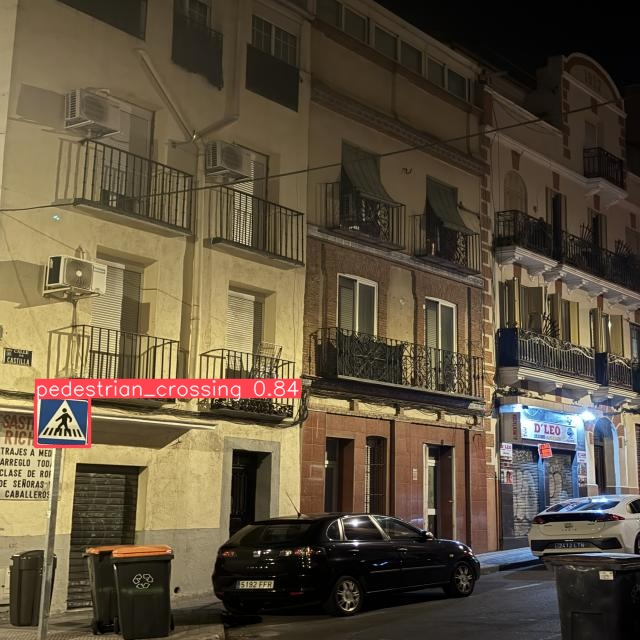

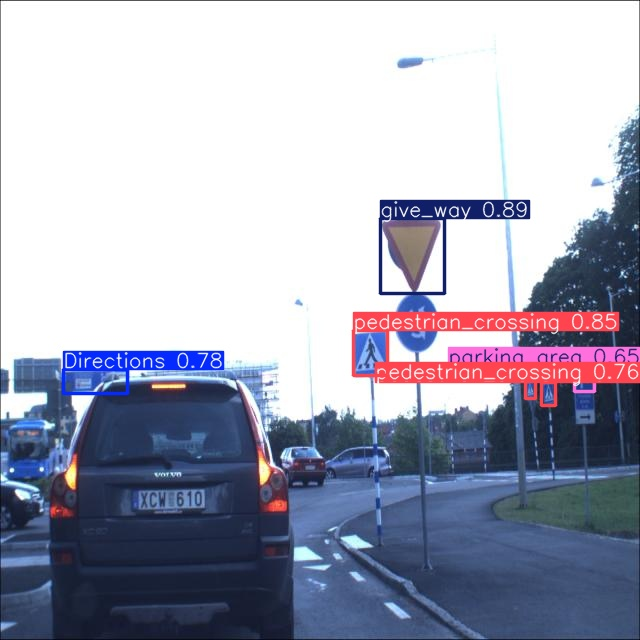

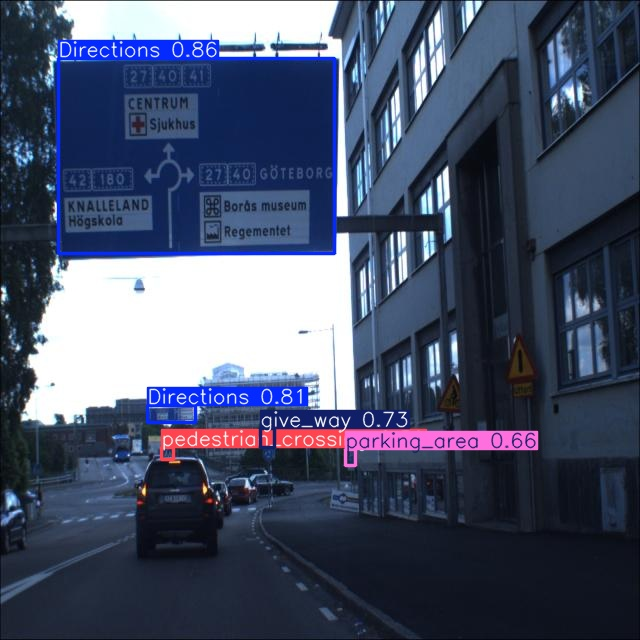

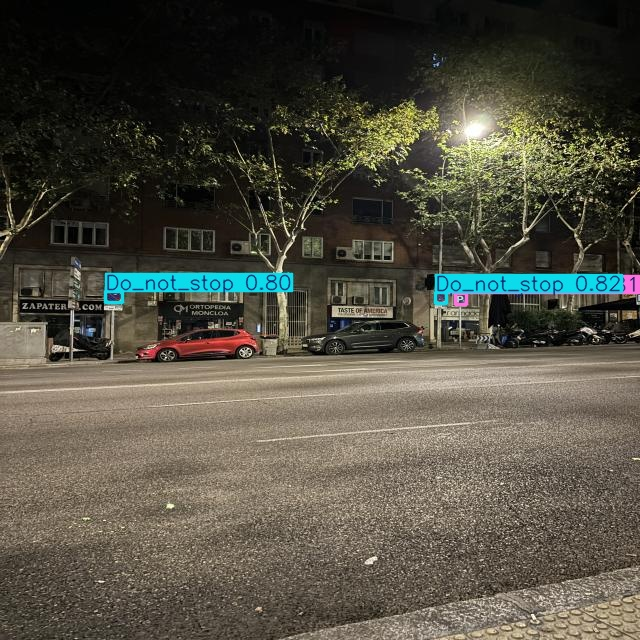

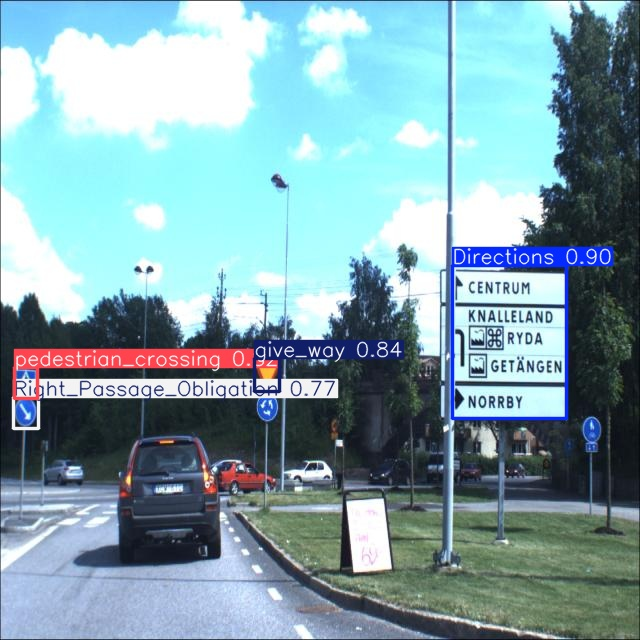

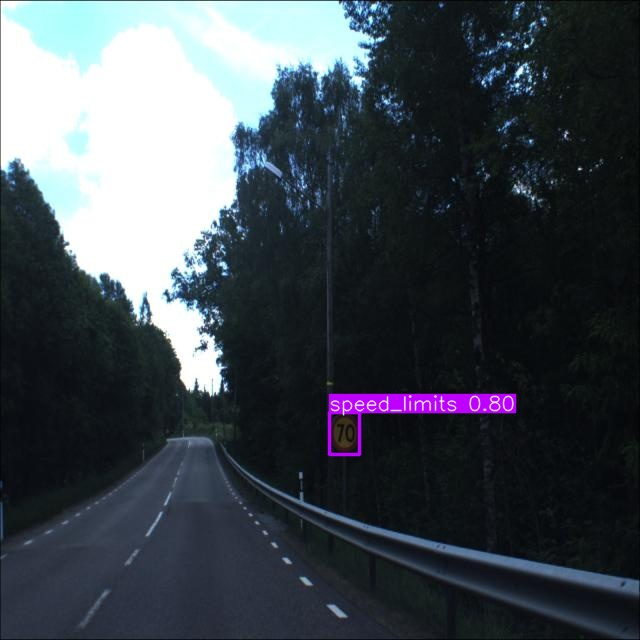

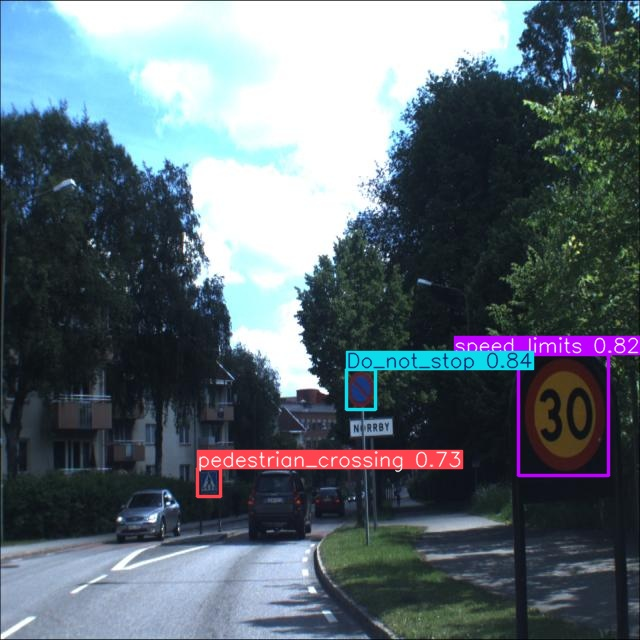

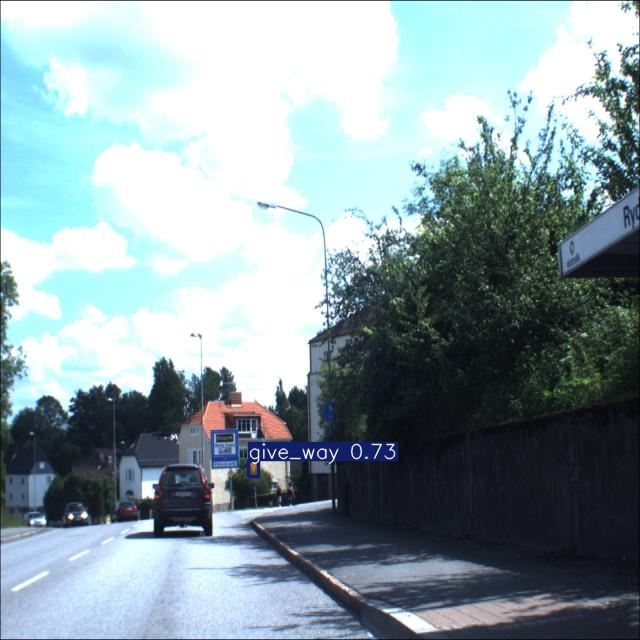

In [21]:
import os
from IPython.display import Image, display

pred_dir = "runs/detect/predict"

predicted_images = [f for f in os.listdir(pred_dir) if f.lower().endswith((".jpg", ".png"))][:10]

for filename in predicted_images:
    display(Image(filename=os.path.join(pred_dir, filename)))

In [ ]:
import os

import shutil
from IPython.display import HTML

# Funzione per comprimere la cartella
def zip_folder(folder_path, output_path):
    # Crea un file ZIP dalla cartella specificata
    shutil.make_archive(output_path, 'zip', folder_path)

# Funzione per creare un link di download
def create_download_link(zip_file_name):
    return HTML('<a href="{}" target="_blank" download>Click here to download {}</a>'.format(zip_file_name, zip_file_name))

# Specifica il percorso della cartella che vuoi comprimere e il nome del file di output
folder_to_zip = '/runs'  # Modifica con il percorso della tua cartella
zip_file_name = '3_Classi_aug_yolo'  # Base name for the zip file

# Zippa la cartella
zip_folder(os.getcwd()+folder_to_zip, zip_file_name)

# Mostra il link per il download
create_download_link(zip_file_name + '.zip')


---

# Classificatore Segnali stradali usurati 

Importazione delle librerie necessarie e configurazione dell'ambiente.

In [5]:
import os
import shutil
from tqdm import tqdm
from roboflow import Roboflow
import random
from ultralytics import YOLO
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


E0000 00:00:1750515135.949540      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750515136.021295      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Configurazione e Download del Dataset

Questa cella imposta l’ambiente di lavoro, connettendosi a Roboflow e preparando le directory necessarie per l’elaborazione.

- **Connessione a Roboflow**: Si connette alla piattaforma tramite una chiave API, selezionando il workspace, il progetto (`object-detection-signals-2`) e la versione che contiene i tags worn-out.

- **Download del Dataset Sorgente**: Scarica il dataset in formato YOLOv8 nella cartella locale `/kaggle/working/Dataset-V3-YOLO`. 

- **Creazione delle Cartelle di Destinazione**: Crea la struttura delle cartelle di output in `/kaggle/working/full_images_sorted`, con due sottocartelle: `good` e `worn-out`. Queste directory ospiteranno le immagini intere dopo che saranno state ordinate nello script successivo.


In [145]:
rf = Roboflow(api_key="3TtQzlTxV5vuuUIr5sJk") 
project = rf.workspace("toquinho").project("object-detection-signals-2")
version = project.version(1) 

yolo_data_path = "/kaggle/working/Dataset-V3-YOLO"
if not os.path.exists(yolo_data_path):
    print(f"Scaricando il dataset YOLO completo in {yolo_data_path}...")
    version.download("yolov8", location=yolo_data_path)
else:
    print(f"Dataset YOLO già presente in {yolo_data_path}.")

sorted_full_images_dir = '/kaggle/working/full_images_sorted'
os.makedirs(os.path.join(sorted_full_images_dir, 'good'), exist_ok=True)
os.makedirs(os.path.join(sorted_full_images_dir, 'worn-out'), exist_ok=True)

loading Roboflow workspace...
loading Roboflow project...
Dataset YOLO già presente in /kaggle/working/Dataset-V3-YOLO.


## Interrogazione API e Lettura dei File Locali

Questa cella ha il compito di preparare le liste di file che verranno usate per l’ordinamento, combinando informazioni ottenute dall’API di Roboflow con quelle lette dal file system locale.

- **Interrogazione API per i Tag**:
  - Viene utilizzata la funzione `project.search()` per ottenere da Roboflow l’elenco di tutte le immagini a cui è stato assegnato il tag `worn-out`.
  - I nomi di questi file vengono salvati in un set chiamato `worn_out_original_names` per permettere una ricerca rapida ed efficiente nello step successivo.

- **Scansione dei File Locali**:
  - Il codice ispeziona le sottocartelle `train/images`, `valid/images` e `test/images` del dataset precedentemente scaricato.
  - Crea una lista completa, `all_files_on_disk`, che contiene i nomi di tutti i file immagine fisicamente presenti sul disco di Kaggle.

In [146]:
print("\nInterrogando l'API per le immagini con tag 'worn-out'...")
search_results = project.search(tag="worn-out")
worn_out_original_names = {image['name'] for image in search_results}
print(f"Trovate {len(worn_out_original_names)} immagini con il tag 'worn-out' via API.")

print("Leggendo tutti i file immagine scaricati dal disco locale...")
all_files_on_disk = []
for split in ['train', 'valid', 'test']:
    image_dir = os.path.join(yolo_data_path, split, 'images')
    if os.path.exists(image_dir):
        all_files_on_disk.extend(os.listdir(image_dir))
print(f"Trovati un totale di {len(all_files_on_disk)} file immagine sul disco.")


Interrogando l'API per le immagini con tag 'worn-out'...
Trovate 50 immagini con il tag 'worn-out' via API.
Leggendo tutti i file immagine scaricati dal disco locale...
Trovati un totale di 1591 file immagine sul disco.


### Ordinamento e Copia dei File

Itera su ogni file immagine scaricato ed esegue la logica di smistamento per popolare le cartelle `good` e `worn-out` create nella cella precedente.

- **Iterazione sui File**:  
  Un ciclo `for` scorre la lista `all_files_on_disk`

- **Ricostruzione del Nome Originale**:   
  Questo passaggio è fondamentale per confrontare correttamente i file locali con la lista dei nomi “usurati” ottenuti tramite API da Roboflow.

- **Logica di Smistamento**:    
  Se presente, l’immagine viene assegnata alla cartella `worn-out`; altrimenti, viene classificata come `good`.  
  I contatori di entrambe le classi vengono aggiornati di conseguenza.

- **Copia del File**:  
  Una volta determinata la classe, il codice cerca il percorso effettivo del file all’interno delle sottocartelle `train`, `valid` o `test`,  
  e lo copia nella cartella di destinazione (`good` o `worn-out`).


In [147]:
worn_out_copied_count = 0
good_copied_count = 0

print("\nInizio copia delle immagini nelle cartelle 'good' e 'worn-out'...")
for file_on_disk in tqdm(all_files_on_disk, desc="Ordinando e copiando i file"):
    
    base_name_with_underscore = file_on_disk.split('.rf.')[0]
    name_parts = base_name_with_underscore.rsplit('_', 1)
    if len(name_parts) == 2:
        original_filename_reconstructed = f"{name_parts[0]}.{name_parts[1]}"
    else:
        original_filename_reconstructed = base_name_with_underscore

    # Determina la cartella di destinazione
    if original_filename_reconstructed in worn_out_original_names:
        destination_folder = os.path.join(sorted_full_images_dir, 'worn-out')
        worn_out_copied_count += 1
    else:
        destination_folder = os.path.join(sorted_full_images_dir, 'good')
        good_copied_count += 1
        
    source_path = None
    for split in ['train', 'valid', 'test']:
        path_to_check = os.path.join(yolo_data_path, split, 'images', file_on_disk)
        if os.path.exists(path_to_check):
            source_path = path_to_check
            break
            
    if source_path:
        destination_path = os.path.join(destination_folder, file_on_disk)
        if not os.path.exists(destination_path):
            shutil.copy(source_path, destination_path)

print(f"\nCopiato un totale di {good_copied_count} immagini 'good'.")
print(f"Copiato un totale di {worn_out_copied_count} immagini 'worn-out'.")


Inizio copia delle immagini nelle cartelle 'good' e 'worn-out'...


Ordinando e copiando i file: 100%|██████████| 1591/1591 [00:00<00:00, 5901.19it/s]


Copiato un totale di 1541 immagini 'good'.
Copiato un totale di 50 immagini 'worn-out'.


### Verifica Finale dell'Ordinamento

Questa cella finale ha lo scopo di confermare il successo dell'operazione e di fornire un'anteprima del risultato.

In [148]:
print("\nProcesso di ordinamento completato!")
print("Verifica del contenuto delle nuove cartelle (prime 5 voci):")
!echo "--- Contenuto di full_images_sorted/good ---" && ls /kaggle/working/full_images_sorted/good | head -n 5
!echo "\n--- Contenuto di full_images_sorted/worn-out ---" && ls /kaggle/working/full_images_sorted/worn-out | head -n 5


Processo di ordinamento completato!
Verifica del contenuto delle nuove cartelle (prime 5 voci):
--- Contenuto di full_images_sorted/good ---
1277381619Image000002_jpg.rf.102c7f329654f569b0c651a6be208aed.jpg
1277381655Image000004_jpg.rf.504077af37e259fec02a0e0c67b63375.jpg
1277381655Image000009_jpg.rf.21b2e5dd5f5e0978213f52c885b527b2.jpg
1277381655Image000014_jpg.rf.15895d47921cfefc8ad8deaf61229ba4.jpg
1277381655Image000015_jpg.rf.c7585b9eecb3d738d3384e84fbce2506.jpg
ls: write error: Broken pipe
\n--- Contenuto di full_images_sorted/worn-out ---
1277383154Image000004_jpg.rf.975df10e8c14db11293e092eeae28e2c.jpg
1277383154Image000007_jpg.rf.db800e8f48ab6622ed5fef6348bd9a4e.jpg
1277383154Image000009_jpg.rf.30a893c0b6518dcb1ceaefb9456fbfe1.jpg
1277383154Image000012_jpg.rf.7184a7dcf56d28aa3ecf8c78f1ab0333.jpg
1277383154Image000013_jpg.rf.8d6cc7f320b8d9e7efd62de960899c13.jpg


---

# Utilizzo modello Yolo11 per detection e successivamente ritaglio

## Configurazione dei percorsi

In [149]:
# Percorsi delle immagini intere già ordinate
worn_out_source_dir = "/kaggle/working/full_images_sorted/worn-out"
good_source_dir = "/kaggle/working/full_images_sorted/good"

# Percorso modello YOLO11 allenato 
yolo_model_path = "/kaggle/working/datasets/Yolo11_Wandb/run_yolo116/weights/best.pt"

# Cartella di destinazione finale per il dataset ritagliato
final_dataset_dir = '/kaggle/working/final_cropped_dataset'


### Preparazione per il Cropping: Caricamento Modello e Campionamento Dati

Questa cella esegue i passaggi preliminari essenziali prima di avviare il processo di cropping vero e proprio.

- **Creazione delle Cartelle Finali**:  
  Utilizza `os.makedirs` per creare la struttura delle directory di destinazione (`final_cropped_dataset`),  
  con le sottocartelle `good` e `worn-out`. Queste ospiteranno le immagini finali dopo il ritaglio.

- **Caricamento del Modello di Detection**:  
  Carica il modello YOLO pre-allenato dal percorso specificato.  
  Questo modello verrà utilizzato nella fase successiva per identificare la posizione dei segnali stradali all'interno di ogni immagine.

- **Selezione e Campionamento delle Immagini**:  
  Prepara le liste dei file immagine da elaborare:
  - Recupera i nomi di tutti i file presenti nella cartella `worn-out`.
  - Recupera i nomi di tutti i file dalla cartella `good`, ma ne seleziona casualmente solo **40**  
    Questo passaggio è utile per costruire un dataset finale più bilanciato tra le due classi.


In [ ]:
os.makedirs(os.path.join(final_dataset_dir, 'good'), exist_ok=True)
os.makedirs(os.path.join(final_dataset_dir, 'worn-out'), exist_ok=True)

# Carico il modello
print(f"Caricamento del modello YOLO da: {yolo_model_path}")
if not os.path.exists(yolo_model_path):
    raise FileNotFoundError(f"Modello non trovato al percorso specificato: {yolo_model_path}")
model = YOLO(yolo_model_path)
print("Modello caricato con successo.")

# Seleziona le immagini da processare
worn_out_files = os.listdir(worn_out_source_dir)
good_files_all = os.listdir(good_source_dir)

# Prendo 60 immagini casuali 
num_good_to_sample = 60
if len(good_files_all) < num_good_to_sample:
    print(f"Attenzione: ci sono meno di {num_good_to_sample} immagini 'good'. Ne userò {len(good_files_all)}.")
    num_good_to_sample = len(good_files_all)

good_files_sample = random.sample(good_files_all, num_good_to_sample)

print(f"Verranno processate {len(worn_out_files)} immagini 'worn-out'.")
print(f"Verranno processate {len(good_files_sample)} immagini 'good'.")


### Funzione di Elaborazione: `process_and_crop_images`

Questa funzione è progettata per essere riutilizzabile e si occupa di prendere una lista di immagini, eseguire la detection dei segnali e salvare i risultati ritagliati.

Il suo funzionamento si articola nei seguenti passaggi:

- **Iterazione sui File**:  
  La funzione riceve una lista di nomi di file (`source_files`) e li processa uno alla volta, mostrando una barra di avanzamento tramite `tqdm`.

- **Detection con YOLO**:  
  Per ogni immagine, utilizza `model.predict()` per rilevare i segnali stradali presenti.  
  Il modello restituisce una lista di bounding box, ovvero le coordinate dei rettangoli che delimitano ciascun segnale.

- **Gestione degli Errori**:  
  Un blocco `try...except` protegge l’elaborazione: se un file immagine è corrotto o non leggibile, viene stampato un messaggio di avviso e il processo continua con l’immagine successiva.

- **Ciclo sui Bounding Box**:  
  Poiché un’immagine può contenere più segnali, un secondo ciclo `for` scorre ogni bounding box rilevato dal modello.

- **Ritaglio e Salvataggio**:  
  Usando le coordinate del bounding box, l’immagine viene ritagliata con la libreria `Pillow` tramite `original_image.crop()`.  
  L’immagine risultante (contenente solo il segnale) viene salvata nella cartella di destinazione con un nome univoco (es. `nomefile_crop0.jpg`).

- **Conteggio**:  
  Un contatore tiene traccia del numero totale di immagini ritagliate prodotte.  
  Questo valore viene restituito dalla funzione per poter stampare un riepilogo finale dell’operazione.


In [151]:
def process_and_crop_images(source_files, source_dir, destination_dir, model):
    cropped_count = 0
    for filename in tqdm(source_files, desc=f"Cropping in {os.path.basename(destination_dir)}"):
        source_path = os.path.join(source_dir, filename)

        results = model.predict(source_path, verbose=False)
        
        try:
            original_image = Image.open(source_path).convert("RGB")
        except Exception as e:
            print(f"Impossibile aprire l'immagine {filename}, la salto. Errore: {e}")
            continue

        for i, box in enumerate(results[0].boxes.xyxy):

            cropped_image = original_image.crop(box.tolist())
          
            base_name = os.path.splitext(filename)[0]
            output_filename = f"{base_name}_crop{i}.jpg"
            output_path = os.path.join(destination_dir, output_filename)
    
            cropped_image.save(output_path)
            cropped_count += 1
            
    return cropped_count

### Esecuzione del Cropping per le Immagini delle Due Classi


- **Cropping delle Immagini 'worn-out'**:  
  Viene avviato il ritaglio di tutte le immagini appartenenti alla classe `worn-out`,  
  Le immagini ritagliate vengono salvate nella sottocartella `worn-out` all’interno della directory finale `final_cropped_dataset`.

- **Cropping delle Immagini 'good'**:  
  Viene poi avviato il ritaglio su un campione casuale di immagini della classe `good`,  
  Anche in questo caso, le immagini risultanti vengono salvate nella sottocartella `good` della directory di destinazione.



In [152]:
print("\nInizio cropping delle immagini 'worn-out'...")
num_cropped_worn_out = process_and_crop_images(
    worn_out_files, 
    worn_out_source_dir, 
    os.path.join(final_dataset_dir, 'worn-out'), 
    model
)

print("\nInizio cropping delle immagini 'good'...")
num_cropped_good = process_and_crop_images(
    good_files_sample, 
    good_source_dir, 
    os.path.join(final_dataset_dir, 'good'), 
    model
)


Inizio cropping delle immagini 'worn-out'...


Cropping in worn-out: 100%|██████████| 50/50 [00:46<00:00,  1.07it/s]



Inizio cropping delle immagini 'good'...


Cropping in good: 100%|██████████| 60/60 [00:55<00:00,  1.08it/s]


### Verifica Finale del Cropping ed Esplorazione del Risultato

Al termine del processo di ritaglio, questa cella:

- **Stampa un messaggio di conferma**:  
  Segnala il completamento dell’intero processo di cropping.

- **Mostra un riepilogo numerico**:  
  Indica quante immagini ritagliate sono state create per ciascuna delle due classi:
  - 60 immagini `good` → `num_cropped_good` 125 seganli trovati
  - 50 immagini `worn-out` → `num_cropped_worn_out` 109 seganli trovati



In [153]:

print("\nProcesso di cropping completato!")
print(f"Create {num_cropped_good} immagini ritagliate 'good'.")
print(f"Create {num_cropped_worn_out} immagini ritagliate 'worn-out'.")

print("\nVerifica del contenuto delle cartelle finali:")
!echo "--- Contenuto di final_cropped_dataset/good ---" && ls /kaggle/working/final_cropped_dataset/good | head -n 5
!echo "\n--- Contenuto di final_cropped_dataset/worn-out ---" && ls /kaggle/working/final_cropped_dataset/worn-out | head -n 5


Processo di cropping completato!
Create 125 immagini ritagliate 'good'.
Create 109 immagini ritagliate 'worn-out'.

Verifica del contenuto delle cartelle finali:
--- Contenuto di final_cropped_dataset/good ---
1277381655Image000004_jpg.rf.504077af37e259fec02a0e0c67b63375_crop0.jpg
1277381671Image000001_jpg.rf.1979fa9b648118bbe5add9d76173157c_crop0.jpg
1277381671Image000001_jpg.rf.1979fa9b648118bbe5add9d76173157c_crop1.jpg
1277381671Image000001_jpg.rf.1979fa9b648118bbe5add9d76173157c_crop2.jpg
1277382078Image000014_jpg.rf.a27b9cfdde2fdad5401c93a0d6ccf758_crop0.jpg
\n--- Contenuto di final_cropped_dataset/worn-out ---
1277383154Image000004_jpg.rf.975df10e8c14db11293e092eeae28e2c_crop0.jpg
1277383154Image000007_jpg.rf.db800e8f48ab6622ed5fef6348bd9a4e_crop0.jpg
1277383154Image000009_jpg.rf.30a893c0b6518dcb1ceaefb9456fbfe1_crop0.jpg
1277383154Image000012_jpg.rf.7184a7dcf56d28aa3ecf8c78f1ab0333_crop0.jpg
1277383154Image000013_jpg.rf.8d6cc7f320b8d9e7efd62de960899c13_crop0.jpg


## Visualizzazione Immagini dei segnalin Worn-out

--- Visualizzazione di un campione dalla cartella: /kaggle/working/final_cropped_dataset/worn-out ---


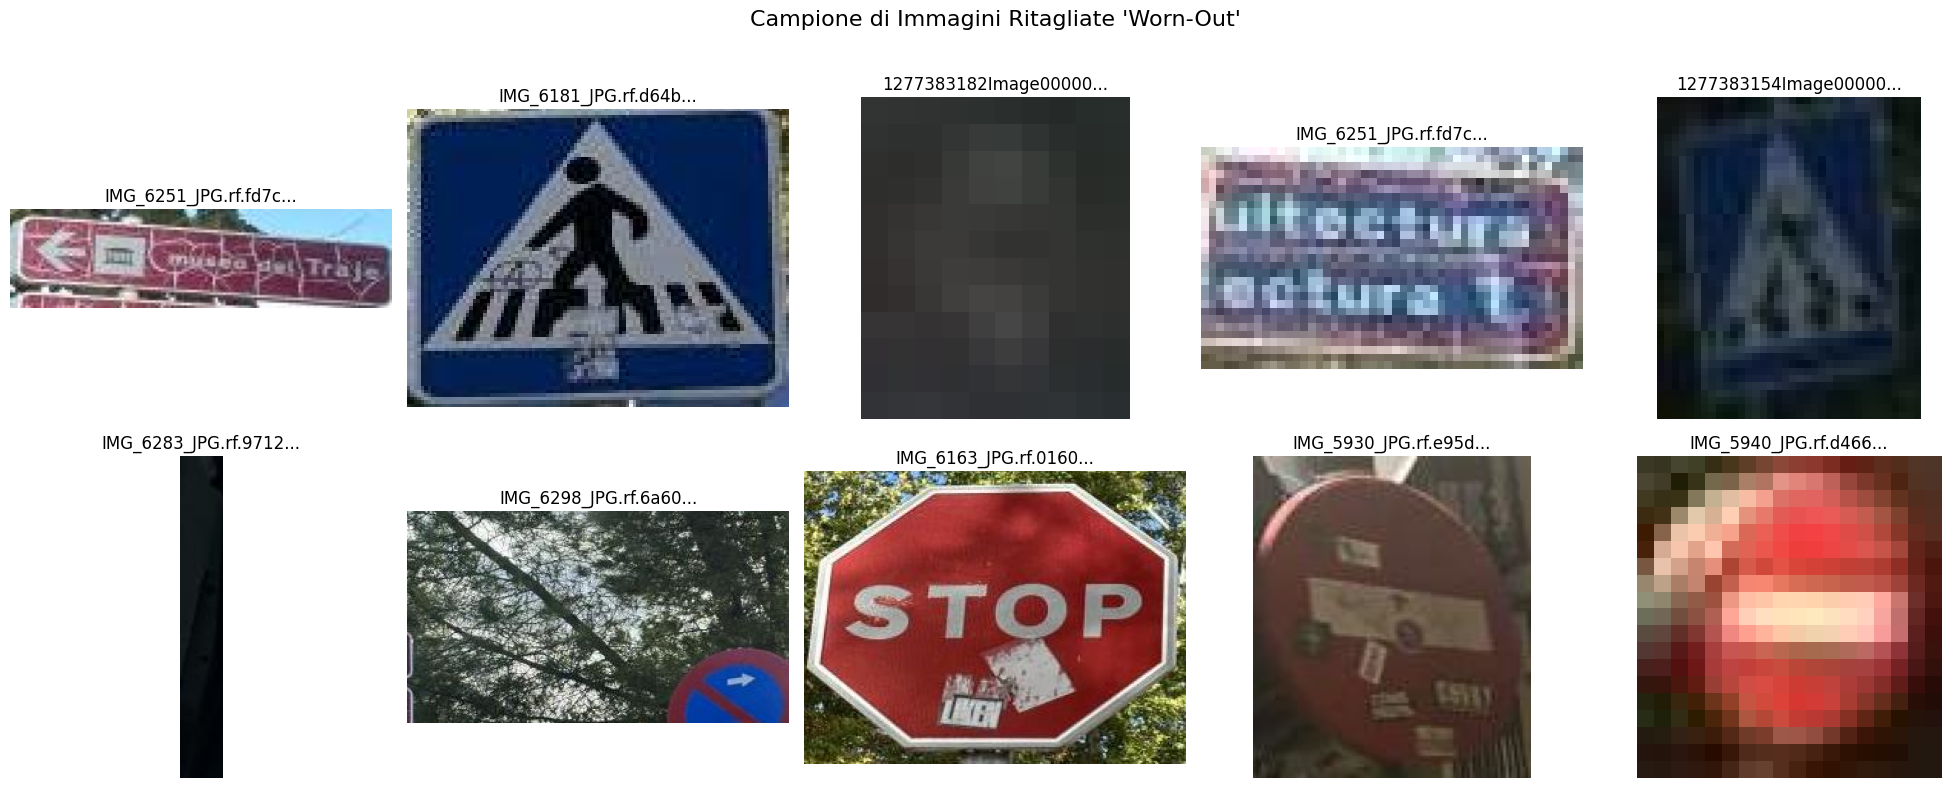

In [154]:
worn_out_dir = '/kaggle/working/final_cropped_dataset/worn-out'

print(f"--- Visualizzazione di un campione dalla cartella: {worn_out_dir} ---")

if os.path.exists(worn_out_dir) and os.listdir(worn_out_dir):
    worn_out_files = os.listdir(worn_out_dir)[:10]
    
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    fig.suptitle("Campione di Immagini Ritagliate 'Worn-Out'", fontsize=16)

    for ax, filename in zip(axes.flatten(), worn_out_files):
        img_path = os.path.join(worn_out_dir, filename)
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(filename[:20] + '...') 
        
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
else:
    print("La cartella 'worn-out' è vuota o non esiste.")

## Visualizzazione Immagini dei segnali good


--- Visualizzazione di un campione dalla cartella: /kaggle/working/final_cropped_dataset/good ---


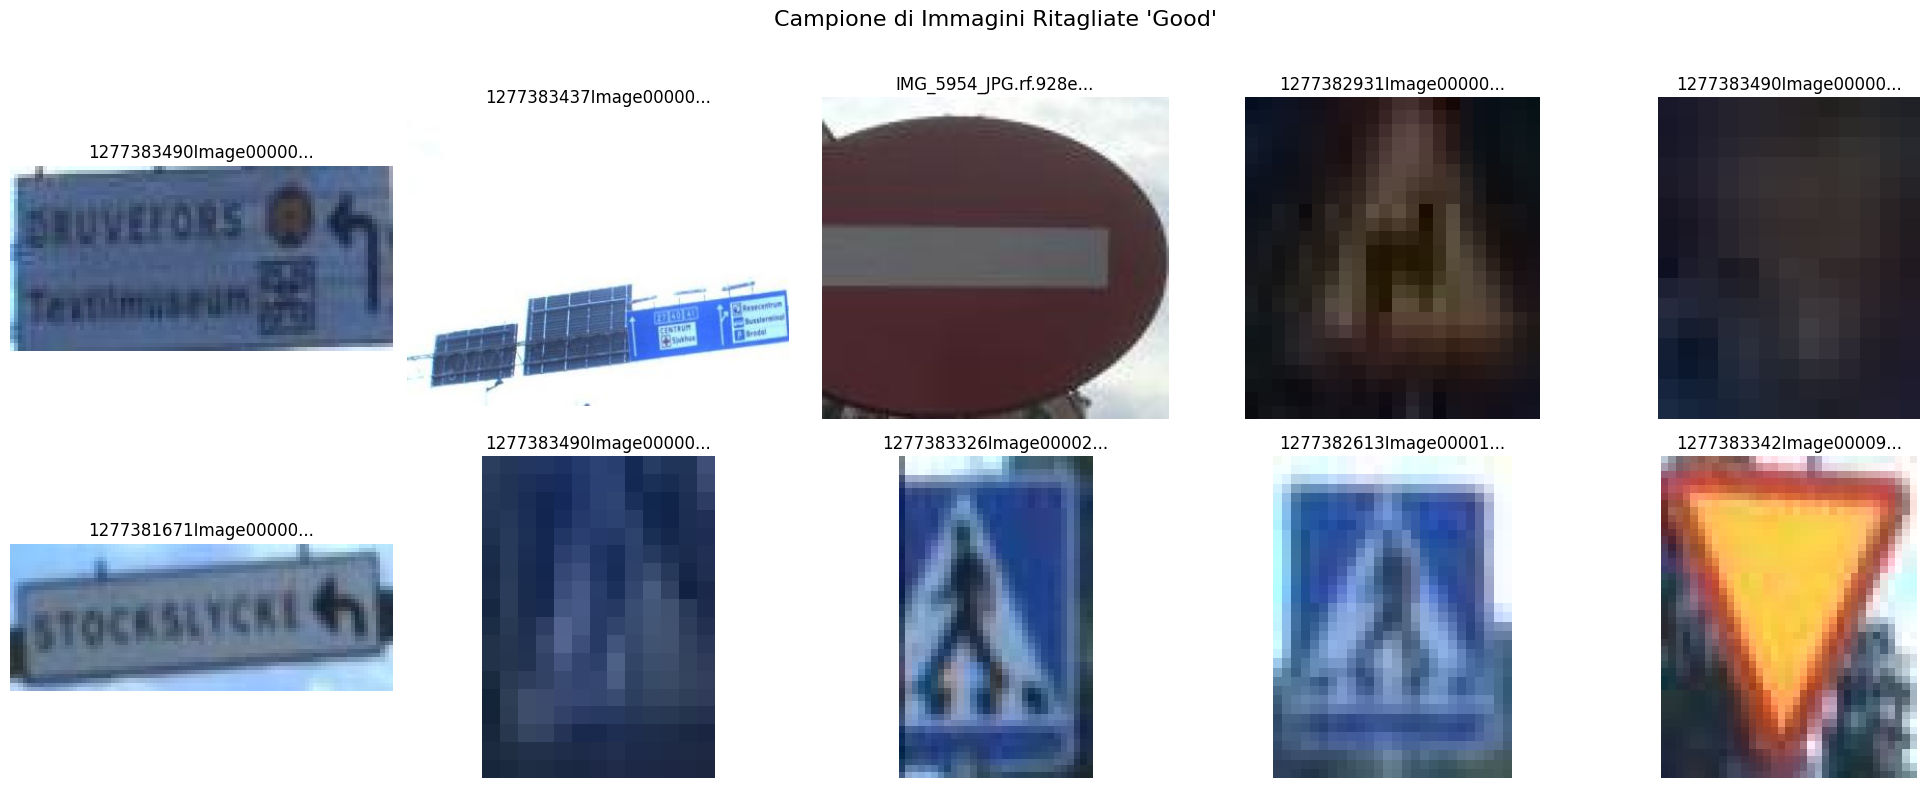

In [155]:
good_dir = '/kaggle/working/final_cropped_dataset/good'

print(f"\n--- Visualizzazione di un campione dalla cartella: {good_dir} ---")

if os.path.exists(good_dir) and os.listdir(good_dir):
    good_files = os.listdir(good_dir)[:10]

    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    fig.suptitle("Campione di Immagini Ritagliate 'Good'", fontsize=16)
    
    for ax, filename in zip(axes.flatten(), good_files):
        img_path = os.path.join(good_dir, filename)
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(filename[:20] + '...')
        
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
else:
    print("La cartella 'good' è vuota o non esiste.")

# Addestramento del Classificatore con Transfer Learning MobileNetV2

### Configurazione dell'Ambiente

In questa sezione viene disabilitata la GPU per forzare l'esecuzione del modello su CPU

In [156]:
try:
    # Disabilita tutte le GPU visibili a TensorFlow
    tf.config.set_visible_devices([], 'GPU')
    # Verifica che nessuna GPU sia visibile
    visible_devices = tf.config.get_visible_devices()
    for device in visible_devices:
        assert device.device_type != 'GPU'
    print("GPU disabilitata")
except Exception as e:
    print(f"Impossibile disabilitare la GPU. Errore: {e}")

GPU disabilitata


### Preparazione del Dataset

- **Suddivisione dei dati**:
  - L'80% delle immagini viene usato per il training.
  - Il restante 20% viene ulteriormente diviso in due:
    - 10% per la validazione
    - 10% per il test
- **Batch e Preprocessing**:
  - Le immagini sono ridimensionate a `224x224` pixel.
  - I dataset sono ottimizzati con `prefetch` per migliorare le performance durante l’addestramento.


In [157]:
DATASET_DIR = "/kaggle/working/final_cropped_dataset"


IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

validation_temp_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_dataset.class_names
print(f"Classi trovate: {class_names}")

val_batches = tf.data.experimental.cardinality(validation_temp_dataset)
test_dataset = validation_temp_dataset.take(val_batches // 2)
validation_dataset = validation_temp_dataset.skip(val_batches // 2)

print(f"Numero di batch per l'addestramento: {tf.data.experimental.cardinality(train_dataset)}")
print(f"Numero di batch per la validazione: {tf.data.experimental.cardinality(validation_dataset)}")
print(f"Numero di batch per il test: {tf.data.experimental.cardinality(test_dataset)}")

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Found 234 files belonging to 2 classes.
Using 188 files for training.
Found 234 files belonging to 2 classes.
Using 46 files for validation.
Classi trovate: ['good', 'worn-out']
Numero di batch per l'addestramento: 6
Numero di batch per la validazione: 1
Numero di batch per il test: 1


---

### Costruzione del Modello (Transfer Learning con MobileNetV2)

- **Data Augmentation**: Viene applicata una leggera trasformazione ai dati di input (flip orizzontale, rotazione) per aumentare la robustezza del modello.
- **Preprocessing**: Applicato con `mobilenet_v2.preprocess_input`.
- **Base Model**:
  - Viene utilizzata `MobileNetV2`

In [158]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')

base_model.trainable = False

inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

# Compiliamo il modello
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

initial_epochs = 15

history = model.fit(
    train_dataset,
    epochs=initial_epochs,
    validation_data=validation_dataset
)

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_7 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide_7 (TrueDivide)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract_7 (Subtract)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5523 - loss: 0.8109 - val_accuracy: 0.5000 - val_loss: 0.7527
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 911ms/step - accuracy: 0.6736 - loss: 0.5931 - val_accuracy: 0.6429 - val_loss: 0.6794
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 784ms/step - accuracy: 0.6519 - loss: 0.5816 - val_accuracy: 0.5000 - val_loss: 0.6895
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 826ms/step - accuracy: 0.7235 - loss: 0.5156 - val_accuracy: 0.7143 - val_loss: 0.5681
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 788ms/step - accuracy: 0.7645 - loss: 0.4823 - val_accuracy: 0.7857 - val_loss: 0.4354
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 791ms/step - accuracy: 0.7630 - loss: 0.4672 - val_accuracy: 0.7857 - val_loss: 0.4898
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 784ms/step - accuracy: 0.8200 - loss: 0.4068 - val_accuracy: 0.8571 - val_loss: 0.4612
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 888ms/step - accuracy: 0.8450 - loss: 0.3671 - val_accuracy: 0.7857 - val_loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step - accuracy: 0.7812 - loss: 0.4860
Accuratezza sul Test Set: 78.12%


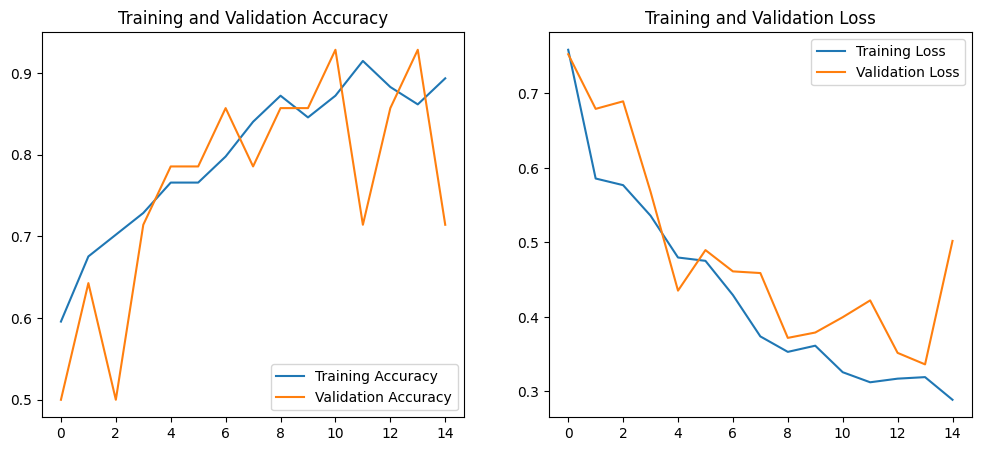

In [159]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Accuratezza sul Test Set: {accuracy * 100:.2f}%")

# Grafici delle performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Valutazione Finale: Classificazione, Precisione e Matrice di Confusione

Questa sezione si occupa dell’analisi approfondita delle performance del modello sul test set.

---

#### Conversione delle Predizioni

- Viene eseguita la predizione sul `test_dataset`, ottenendo una probabilità per ciascuna immagine (valori tra 0 e 1).
---

#### Report di Classificazione

- Viene stampato un **report dettagliato** che include:
  - **Precision**: quante delle predizioni positive erano corrette
  - **Recall**: quante delle istanze positive reali sono state individuate
  - **F1-score**: media armonica tra precision e recall

---

#### Matrice di Confusione

- Viene calcolata la **matrice di confusione**, che confronta le etichette reali con le predizioni.
- Utilizzando `Seaborn`, viene generata una **heatmap leggibile** in cui:
  - Le righe rappresentano le etichette reali.
  - Le colonne rappresentano le etichette predette.
  - I valori mostrano il numero di istanze per ciascuna combinazione.
---
#### Visualizzazione Immagini predette
- Vengono visualizzatte 10 immagini predette

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

--- Report di Classificazione ---

              precision    recall  f1-score   support

        good       0.59      0.50      0.54        20
    worn-out       0.33      0.42      0.37        12

    accuracy                           0.47        32
   macro avg       0.46      0.46      0.46        32
weighted avg       0.49      0.47      0.48        32


--- Matrice di Confusione ---



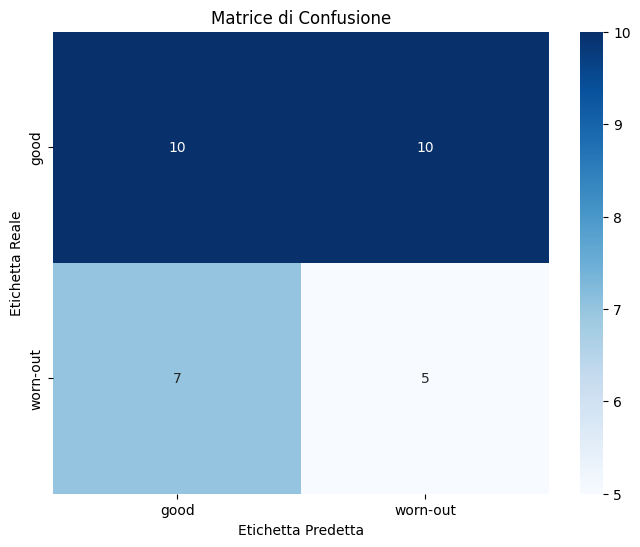


--- Visualizzazione Predizioni Corretta  ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


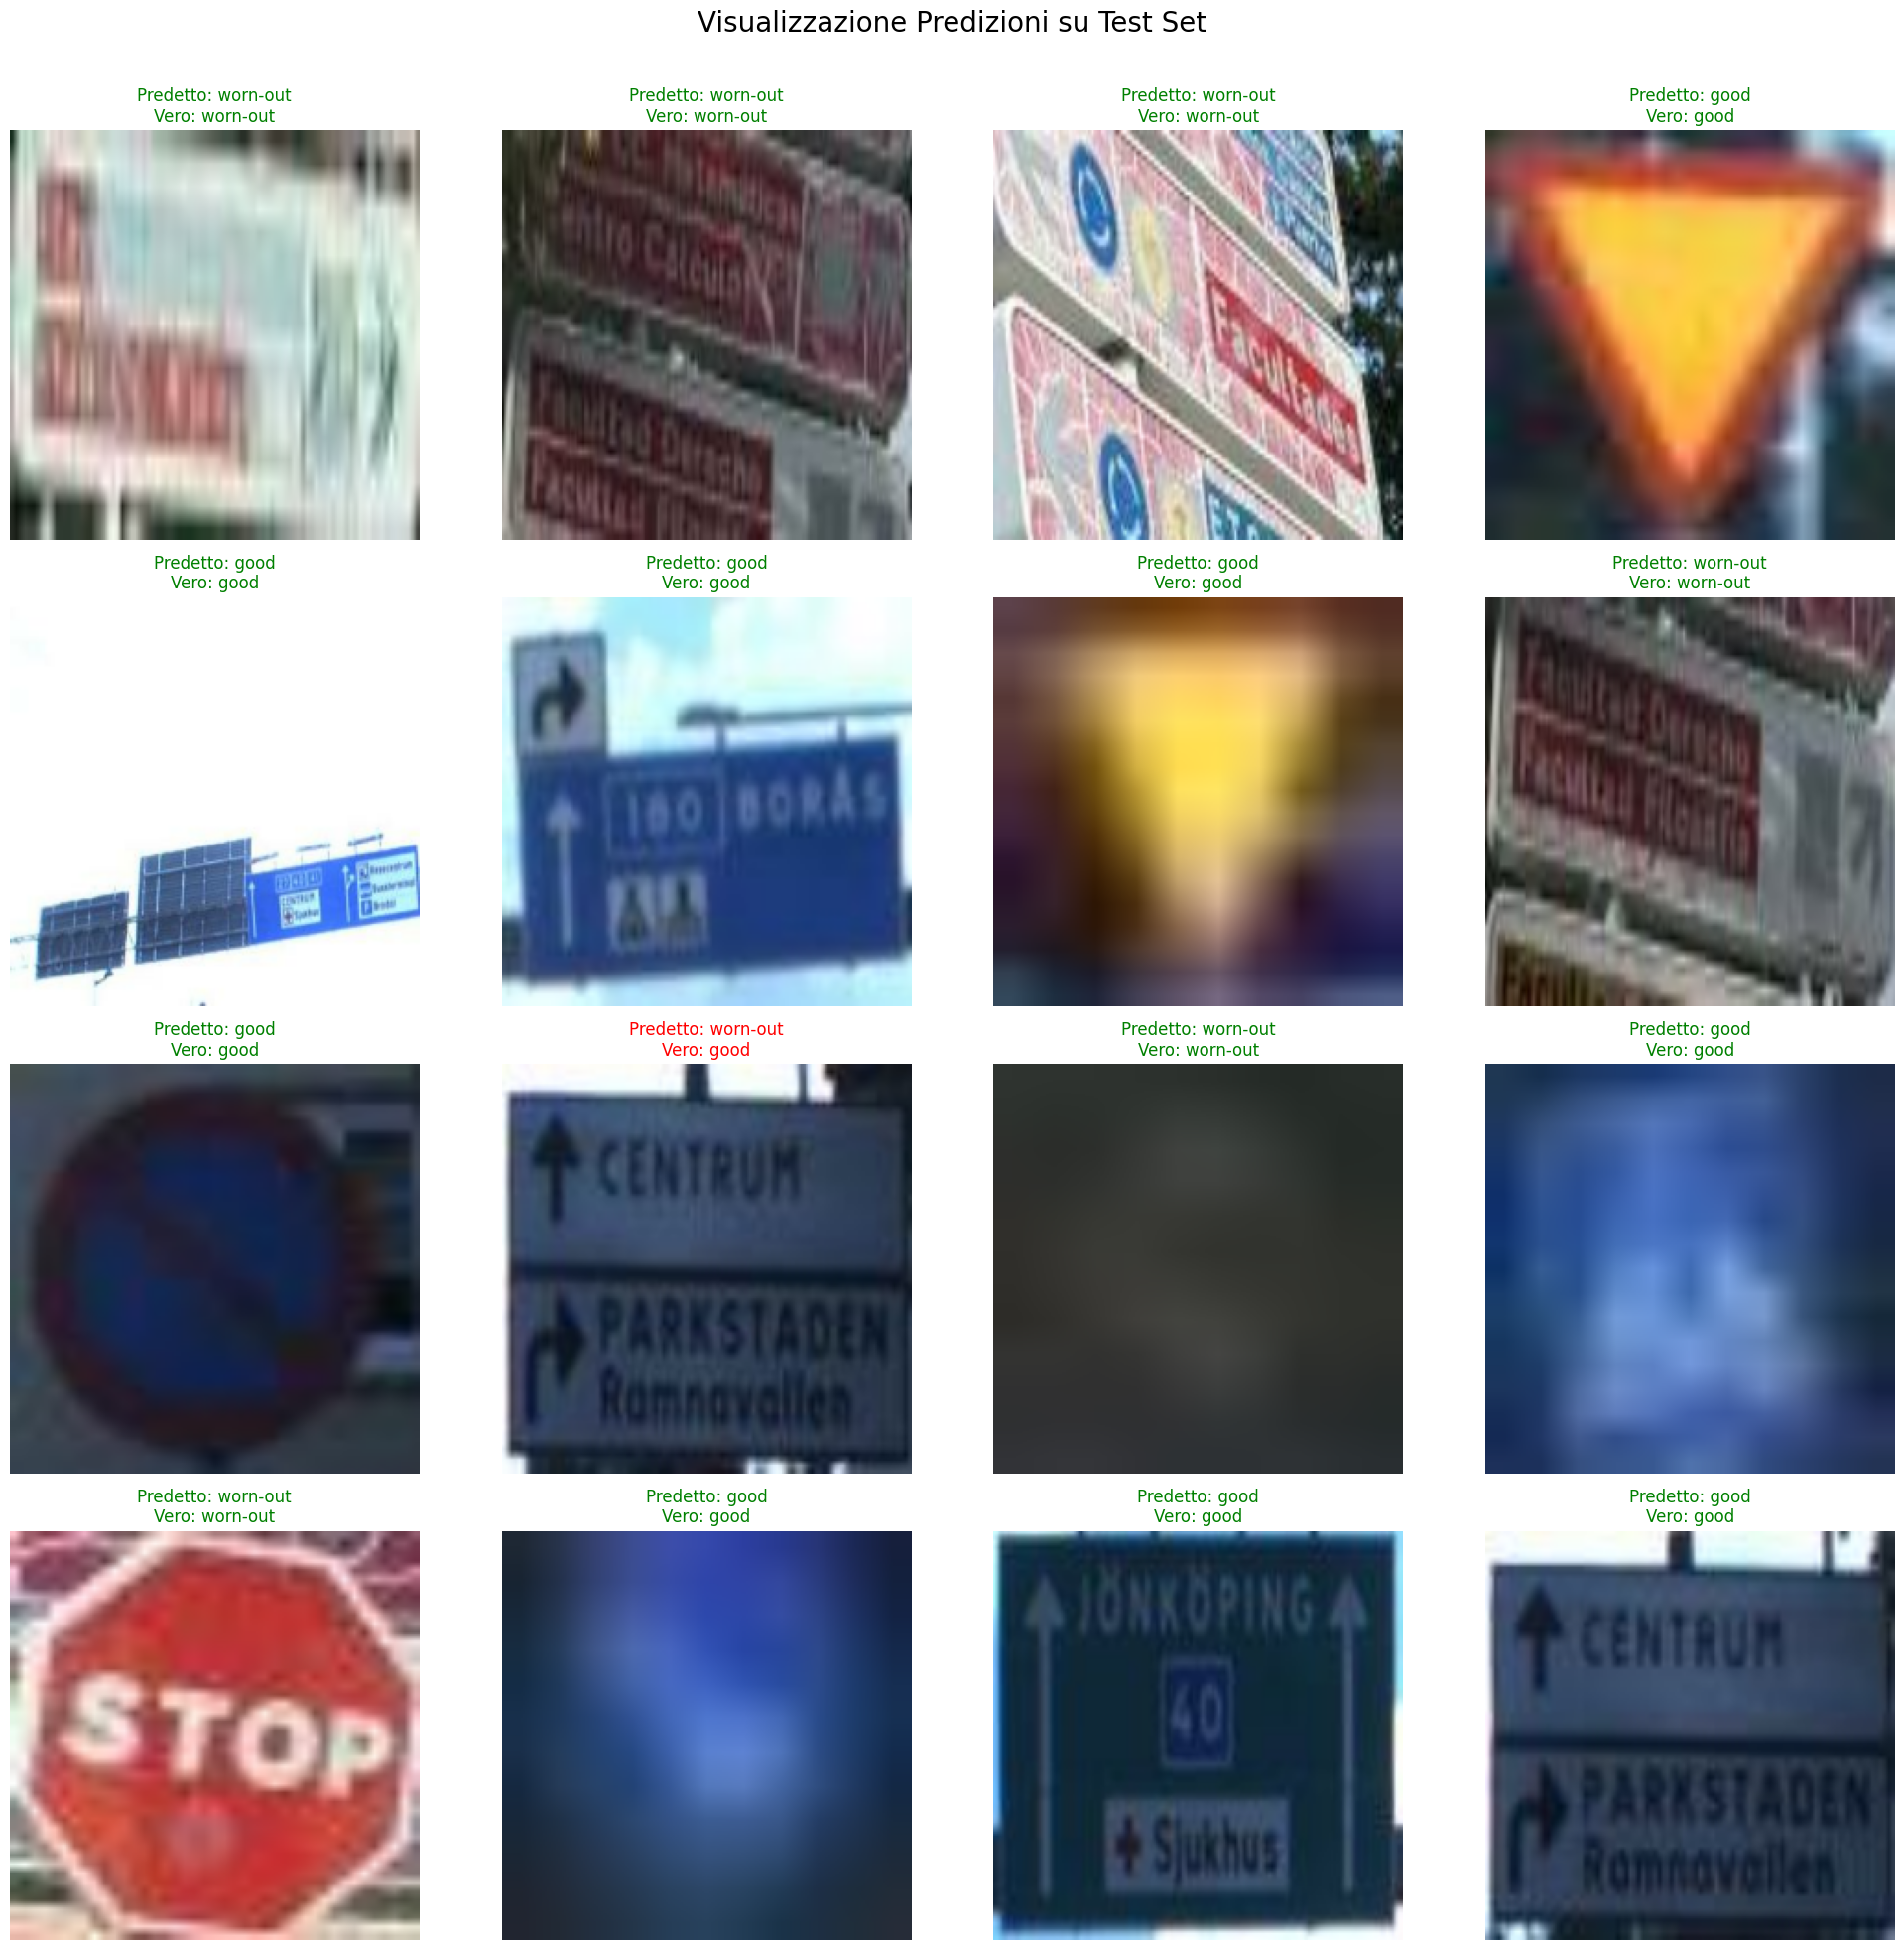

In [160]:
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

y_pred_probs = model.predict(test_dataset)

y_pred_classes = (y_pred_probs > 0.5).astype("int32")


print("\n--- Report di Classificazione ---\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

print("\n--- Matrice di Confusione ---\n")
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice di Confusione')
plt.ylabel('Etichetta Reale')
plt.xlabel('Etichetta Predetta')
plt.show()


#VISUALIZZAZIONE CORRETTA DELLE PREDIZIONI 

print("\n--- Visualizzazione Predizioni Corretta  ---")

for images, labels in test_dataset.take(1):
    images_to_show = images.numpy()
    labels_true = labels.numpy()
    
    labels_pred_probs = model.predict(images_to_show)
    labels_pred = (labels_pred_probs > 0.5).astype("int32").flatten()

plt.figure(figsize=(20, 20))
plt.suptitle("Visualizzazione Predizioni su Test Set", fontsize=20)

for i in range(min(16, len(images_to_show))):
    ax = plt.subplot(4, 4, i + 1)
    
    ax.imshow(images_to_show[i].astype('uint8'))
    
    predicted_class = class_names[labels_pred[i]]
    true_class = class_names[labels_true[i]]
    
    title = f"Predetto: {predicted_class}\nVero: {true_class}"
    color = "green" if predicted_class == true_class else "red"
    
    plt.title(title, color=color)
    plt.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()